# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pickle

In [2]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
%matplotlib inline

# Loading Dataset

In [5]:
reviews = pd.read_csv("data/7282_1.csv", sep=",")
reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",������ ���������������,NaN,sungchul,NaN


In [6]:
reviews = reviews[reviews["categories"] == "Hotels"]
reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",������ ���������������,NaN,sungchul,NaN


In [7]:
reviews = reviews[["reviews.text", "reviews.rating"]]

In [8]:
reviews.head()

,reviews.text,reviews.rating
0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,4.0
1,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,5.0
2,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,5.0
3,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0
4,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0


In [9]:
reviews.rename(columns={"reviews.text": "text", "reviews.rating": "rating"}, inplace=True)

In [10]:
reviews.head()

,text,rating
0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,4.0
1,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,5.0
2,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,5.0
3,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0
4,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0


# Data Exploration

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 35740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    21404 non-null  object 
 1   rating  21370 non-null  float64
dtypes: float64(1), object(1)
memory usage: 502.0+ KB


In [12]:
reviews.isnull().any()

text      True
rating    True
dtype: bool

In [13]:
reviews.dropna(subset=["text", "rating"], inplace=True)

In [14]:
# Assigning a new [0, 1] target class label based on the hotel rating
reviews.loc[reviews["rating"] >= 3, "sentiment"] = 1
reviews.loc[reviews["rating"] < 3, "sentiment"] = 0

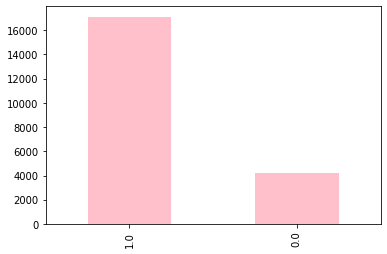

In [15]:
reviews["sentiment"].value_counts().plot.bar(color = "pink", figsize = (6, 4))

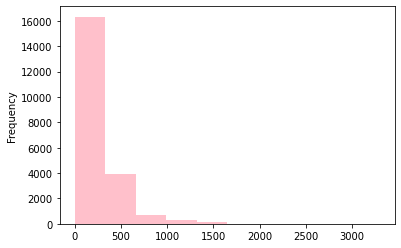

In [16]:
# checking the distribution of reviews in the data

reviews["text"].str.len().plot.hist(color = "pink", figsize = (6, 4))

In [17]:
reviews.groupby("sentiment").describe()

rating                                              
             count      mean       std  min  25%  50%  75%   max
sentiment                                                       
0.0         4245.0  1.479859  0.520088  0.0  1.0  1.0  2.0   2.9
1.0        17109.0  4.205973  0.857604  3.0  4.0  4.0  5.0  10.0

# Sentiment Intensity Analyzer

In [18]:
analyser  = SentimentIntensityAnalyzer()
reviews["scores"] = reviews["text"].apply(lambda review: analyser.polarity_scores(review))

In [19]:
reviews.head(10)

,text,rating,sentiment,scores
0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,4.0,1.0,"{'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'compound': 0.8299}"
1,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,5.0,1.0,"{'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'compound': 0.9828}"
2,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,5.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}"
4,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}"
5,"We loved staying on the island of Lido! You need to take a water is from Venice to get there. From the train station, a boat ride takes 45 minutes but has beautiful views along the way. Hotel is an EASY walk from the boat dock. The room was very clean and the breakfast was plentiful. We would definitely recommend this hotel!",5.0,1.0,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.9779}"
6,Lovely view out onto the lagoon. Excellent view. Staff were welcoming and helpful.,4.0,1.0,"{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.9217}"
7,ottimo soggiorno e ottima sistemazione nei giorni frenetici di inaugurazione della Biennale. Le signore alla reception sono efficientissime e squisite e non sono da meno le ragazze che servono la prima colazione. Da tornarci,4.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
8,"Gnstiger Ausgangspunkt fr Venedig Besuche. Ruhige Lage auf dem Lido. Flugplatz Lido und Bootsanlegestellen fulufig erreichbar. Zimmer ziemlich eng, aber alles vorhanden. Frhstck fr Italien ausgesprochen reichhaltig. Hotel sollte regelmig einen Kammerjger beschftigen, da ein Befall mit Wanzen festzustellen war.",3.0,1.0,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.5994}"
9,"Lidoen er perfekt til et par dages ro og afslapning, skn strand, lkkert omrde og lille hyggeligt familiehotel med et sdt personale",4.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [20]:
reviews["compound"] = reviews["scores"].apply(lambda score: score["compound"])

In [21]:
reviews.head(10)

,text,rating,sentiment,scores,compound
0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,4.0,1.0,"{'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'compound': 0.8299}",0.8299
1,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,5.0,1.0,"{'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'compound': 0.9828}",0.9828
2,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,5.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643
4,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643
5,"We loved staying on the island of Lido! You need to take a water is from Venice to get there. From the train station, a boat ride takes 45 minutes but has beautiful views along the way. Hotel is an EASY walk from the boat dock. The room was very clean and the breakfast was plentiful. We would definitely recommend this hotel!",5.0,1.0,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.9779}",0.9779
6,Lovely view out onto the lagoon. Excellent view. Staff were welcoming and helpful.,4.0,1.0,"{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.9217}",0.9217
7,ottimo soggiorno e ottima sistemazione nei giorni frenetici di inaugurazione della Biennale. Le signore alla reception sono efficientissime e squisite e non sono da meno le ragazze che servono la prima colazione. Da tornarci,4.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
8,"Gnstiger Ausgangspunkt fr Venedig Besuche. Ruhige Lage auf dem Lido. Flugplatz Lido und Bootsanlegestellen fulufig erreichbar. Zimmer ziemlich eng, aber alles vorhanden. Frhstck fr Italien ausgesprochen reichhaltig. Hotel sollte regelmig einen Kammerjger beschftigen, da ein Befall mit Wanzen festzustellen war.",3.0,1.0,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.5994}",-0.5994
9,"Lidoen er perfekt til et par dages ro og afslapning, skn strand, lkkert omrde og lille hyggeligt familiehotel med et sdt personale",4.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [22]:
reviews["compound_sentiment"] = reviews["compound"].apply(lambda score: 1 if score >= 0 else 0)

In [23]:
reviews.head(10)

,text,rating,sentiment,scores,compound,compound_sentiment
0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,4.0,1.0,"{'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'compound': 0.8299}",0.8299,1
1,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,5.0,1.0,"{'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'compound': 0.9828}",0.9828,1
2,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,5.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,1
3,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643,1
4,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643,1
5,"We loved staying on the island of Lido! You need to take a water is from Venice to get there. From the train station, a boat ride takes 45 minutes but has beautiful views along the way. Hotel is an EASY walk from the boat dock. The room was very clean and the breakfast was plentiful. We would definitely recommend this hotel!",5.0,1.0,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.9779}",0.9779,1
6,Lovely view out onto the lagoon. Excellent view. Staff were welcoming and helpful.,4.0,1.0,"{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.9217}",0.9217,1
7,ottimo soggiorno e ottima sistemazione nei giorni frenetici di inaugurazione della Biennale. Le signore alla reception sono efficientissime e squisite e non sono da meno le ragazze che servono la prima colazione. Da tornarci,4.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,1
8,"Gnstiger Ausgangspunkt fr Venedig Besuche. Ruhige Lage auf dem Lido. Flugplatz Lido und Bootsanlegestellen fulufig erreichbar. Zimmer ziemlich eng, aber alles vorhanden. Frhstck fr Italien ausgesprochen reichhaltig. Hotel sollte regelmig einen Kammerjger beschftigen, da ein Befall mit Wanzen festzustellen war.",3.0,1.0,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.5994}",-0.5994,0
9,"Lidoen er perfekt til et par dages ro og afslapning, skn strand, lkkert omrde og lille hyggeligt familiehotel med et sdt personale",4.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,1


In [24]:
print(accuracy_score(reviews["sentiment"], reviews["compound_sentiment"]))

0.8325840591926571


In [25]:
print(classification_report(reviews["sentiment"], reviews["compound_sentiment"]))

              precision    recall  f1-score   support

         0.0       0.58      0.59      0.58      4245
         1.0       0.90      0.89      0.90     17109

    accuracy                           0.83     21354
   macro avg       0.74      0.74      0.74     21354
weighted avg       0.83      0.83      0.83     21354



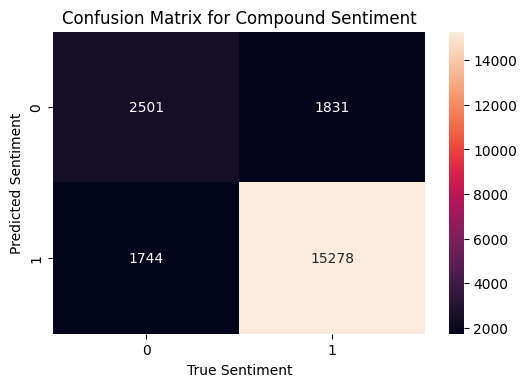

In [26]:
plt.figure(dpi=100)

mat = confusion_matrix(reviews["sentiment"], reviews["compound_sentiment"])
sns.heatmap(mat.T, annot=True, fmt='d', cbar=True)

plt.title('Confusion Matrix for Compound Sentiment')
plt.xlabel('True Sentiment')
plt.ylabel('Predicted Sentiment')
plt.savefig("./confusion_matrix_compound_sentiment.png")
plt.show()

# Data Preparation

In [27]:
def emoji(review):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    review = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', review)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    review = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', review)
    # Love -- <3, :*
    review = re.sub(r'(<3|:\*)', ' positiveemoji ', review)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    review = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', review)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    review = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', review)
    # Cry -- :,(, :'(, :"(
    review = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', review)

    return review

def process_review(review):
    review = review.lower()                                             # Lowercases the string
    review = re.sub('@[^\s]+', '', review)                              # Removes usernames
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', review)   # Remove URLs
    review = re.sub(r"\d+", " ", str(review))                           # Removes all digits
    review = re.sub('&quot;'," ", review)                               # Remove (&quot;) 
    review = emoji(review)                                              # Replaces Emojis
    review = re.sub(r"\b[a-zA-Z]\b", "", str(review))                   # Removes all single characters
    review = re.sub(r"[^\w\s]", " ", str(review))                       # Removes all punctuations
    review = re.sub(r'(.)\1+', r'\1\1', review)                         # Convert more than 2 letter repetitions to 2
    review = re.sub(r"\s+", " ", str(review))                           # Replaces double spaces with single space    
    return review

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
def preprocess(text):
    
    processed_texts = []

    for review in text:
        # Process review
        review = process_review(review)

        preprocessed_words = []
        for word in review.split():
            # Check if the word is a stopword.
            if len(word) > 1 and word not in nltk.corpus.stopwords.words('english'):
                # Lemmatizing the word.
                word = lemmatizer.lemmatize(word)
                preprocessed_words.append(word)

        processed_texts.append(' '.join(preprocessed_words))

    return processed_texts

In [30]:
reviews["text"] = reviews["text"].apply(lambda review: preprocess([review])[0])

In [31]:
reviews.head()

,text,rating,sentiment,scores,compound,compound_sentiment
0,pleasant min walk along sea front water bus restaurant etc hotel comfortable breakfast good quite variety room aircon work well take mosquito repelant,4.0,1.0,"{'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'compound': 0.8299}",0.8299,1
1,really lovely hotel stayed top floor surprised jacuzzi bath know getting staff friendly helpful included breakfast great great location great value money want leave,5.0,1.0,"{'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'compound': 0.9828}",0.9828,1
2,ett mycket bra hotell det som drog ner betyget var att vi fick ett rum taksarna dr det endast var full sthjd av rummets yta,5.0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,1
3,stayed four night october hotel staff welcoming friendly helpful assisted booking ticket opera room clean comfortable good shower light airy room window could open wide bed comfortable plenty choice breakfast spa hotel nearby used,5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643,1
4,stayed four night october hotel staff welcoming friendly helpful assisted booking ticket opera room clean comfortable good shower light airy room window could open wide bed comfortable plenty choice breakfast spa hotel nearby used,5.0,1.0,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643,1


# More Data Exploration

Text(0.5, 1.0, 'Most Frequent Words - Top 30')

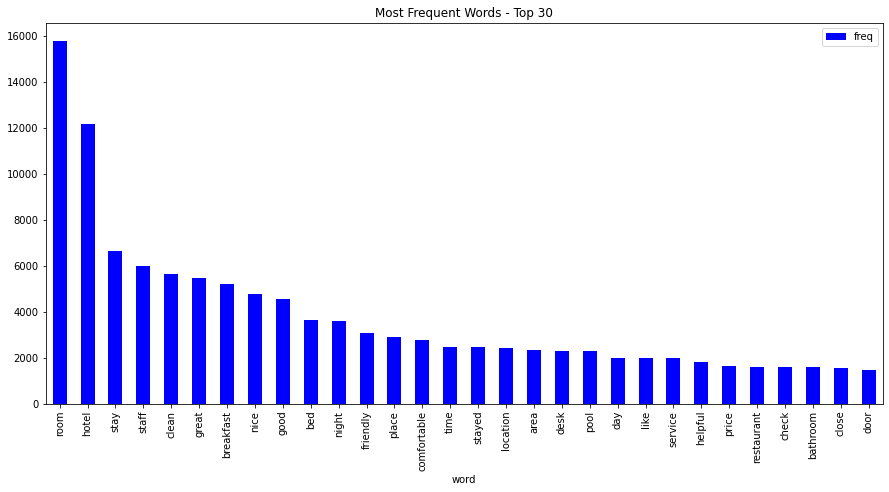

In [32]:
cv = CountVectorizer(stop_words = "english")
words = cv.fit_transform(reviews.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=["word", "freq"])

frequency.head(30).plot(x="word", y="freq", kind="bar", figsize=(15, 7), color = "blue")
plt.title("Most Frequent Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

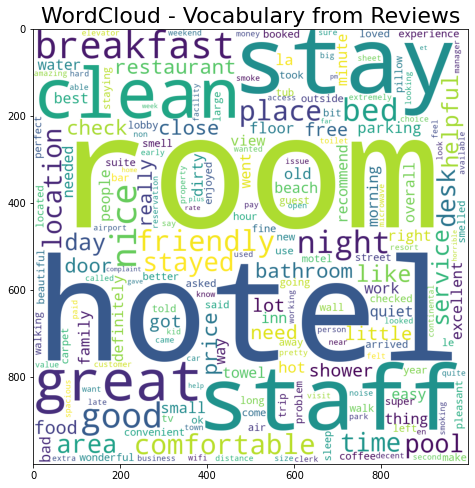

In [33]:
wordcloud = WordCloud(background_color = "white", width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

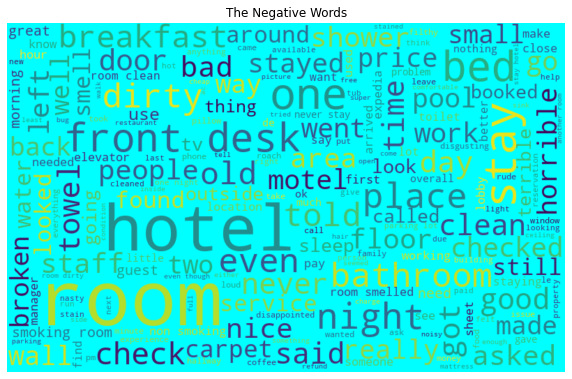

In [34]:
negative_words = ' '.join([review for review in reviews['text'][reviews['sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

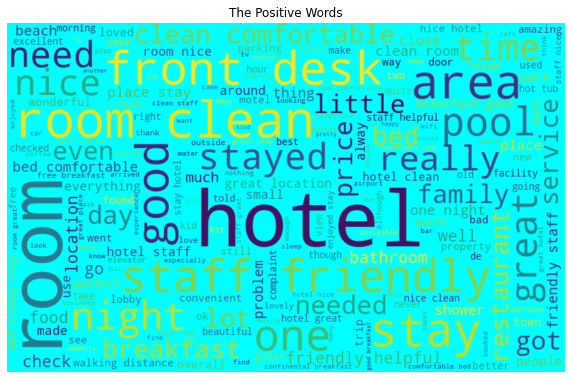

In [35]:
positive_words = ' '.join([review for review in reviews['text'][reviews['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

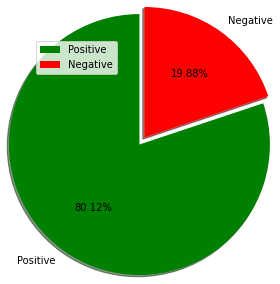

In [36]:
sentiments = ["Positive", "Negative"]

slices = [(reviews["sentiment"] == 1).sum(), (reviews["sentiment"] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

# Train/Test Split & Feature Engineering

In [37]:
X_train, X_test, y_train, y_test = train_test_split(reviews["text"], reviews["sentiment"], test_size = 0.20, random_state = 42)

In [38]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(1, 3))

In [39]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

# Model Training & Evaluation

In [40]:
def model_evaluate(model):
    plt.figure(dpi=100)

    y_pred = model.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report\n")
    print(classification_report(y_test, y_pred))

    print()

    # Confusion Matrix
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, annot=True, fmt='d', cbar=True)

    plt.title('Confusion Matrix for ' + type(model).__name__)
    plt.xlabel('True Sentiment')
    plt.ylabel('Predicted Sentiment')
    plt.savefig("./confusion_matrix_" + type(model).__name__ + ".png")
    plt.show()

    print()

    # ROC Curve
    if hasattr(type(model), 'predict_proba'):
        probs = model.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(y_test, preds)
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic ' + type(model).__name__)
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.ylabel('True Positive Rate', color='g')
        plt.xlabel('False Positive Rate', color='r')
        plt.savefig("./ROC_curve" + type(model).__name__ + ".png")
        plt.show()

Accuracy Score: 0.8063685319597284
Classification Report

              precision    recall  f1-score   support

         0.0       0.67      0.00      0.01       829
         1.0       0.81      1.00      0.89      3442

    accuracy                           0.81      4271
   macro avg       0.74      0.50      0.45      4271
weighted avg       0.78      0.81      0.72      4271




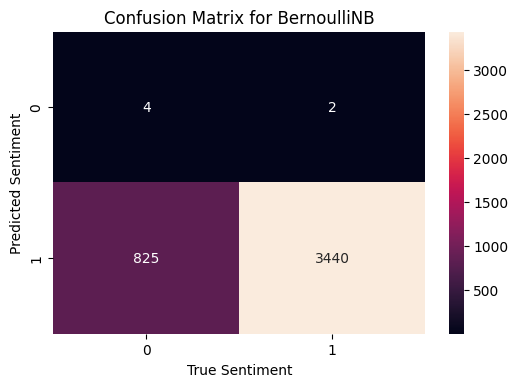

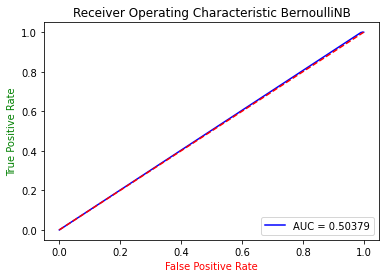

In [41]:
BNB_model = BernoulliNB(alpha = 2)
BNB_model.fit(X_train, y_train)
model_evaluate(BNB_model)

Accuracy Score: 0.8810583001638961
Classification Report

              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       829
         1.0       0.93      0.92      0.93      3442

    accuracy                           0.88      4271
   macro avg       0.81      0.82      0.81      4271
weighted avg       0.88      0.88      0.88      4271




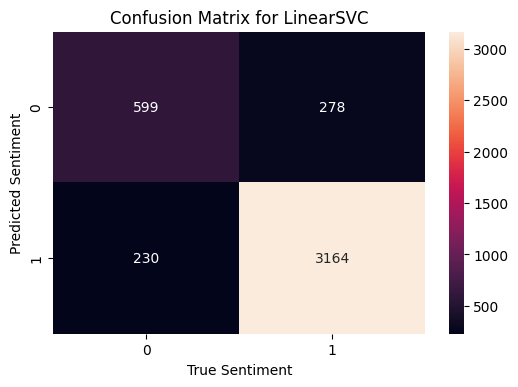

In [42]:
SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)
model_evaluate(SVC_model)

Accuracy Score: 0.8815265745726996
Classification Report

              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68       829
         1.0       0.92      0.94      0.93      3442

    accuracy                           0.88      4271
   macro avg       0.82      0.79      0.80      4271
weighted avg       0.88      0.88      0.88      4271




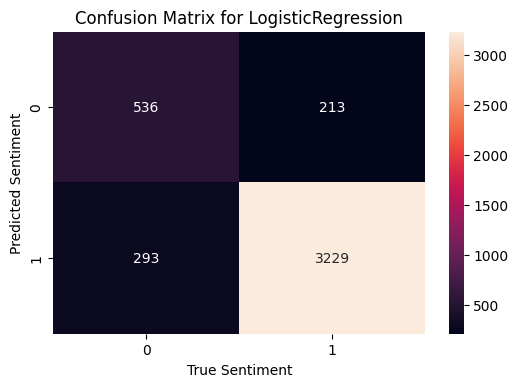

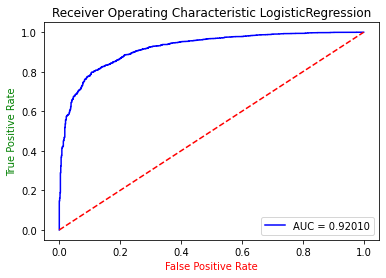

In [43]:
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR_model.fit(X_train, y_train)
model_evaluate(LR_model)

Accuracy Score: 0.8096464528213533
Classification Report

              precision    recall  f1-score   support

         0.0       0.90      0.02      0.04       829
         1.0       0.81      1.00      0.89      3442

    accuracy                           0.81      4271
   macro avg       0.85      0.51      0.47      4271
weighted avg       0.83      0.81      0.73      4271




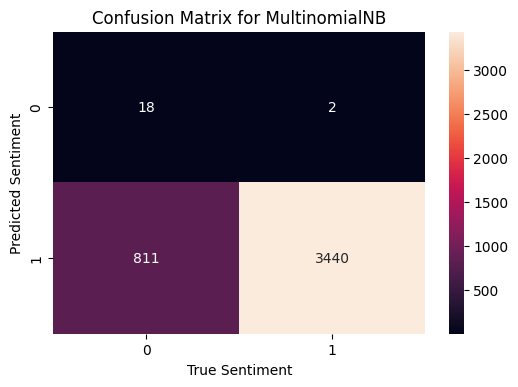

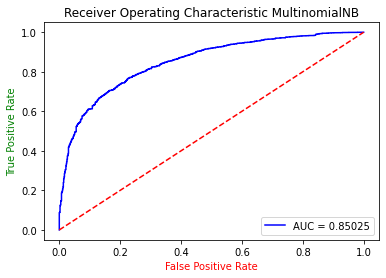

In [44]:
MultinomialNB_model = MultinomialNB()
MultinomialNB_model.fit(X_train, y_train)
model_evaluate(MultinomialNB_model)

# Deployment Pipeline

Accuracy Score: 0.8815265745726996
Classification Report

              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68       829
         1.0       0.92      0.94      0.93      3442

    accuracy                           0.88      4271
   macro avg       0.82      0.79      0.80      4271
weighted avg       0.88      0.88      0.88      4271




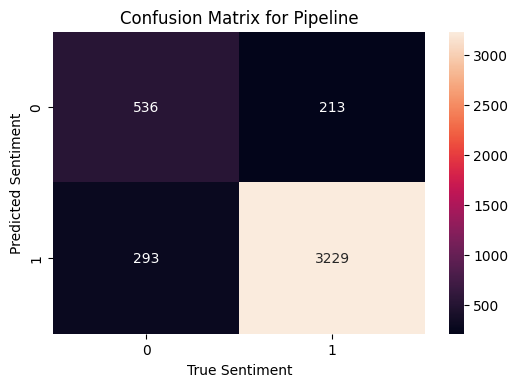

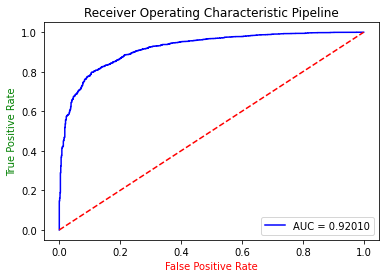

In [45]:
# Pipeline
X_train, X_test, y_train, y_test = train_test_split(reviews["text"], reviews["sentiment"], test_size = 0.20, random_state = 42)

pipe = Pipeline([('vectorizer', vectorizer), ('lr', LR_model)])
pipe.fit(X_train, y_train)

model_evaluate(pipe)

Accuracy Score: 0.8815265745726996
Classification Report

              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68       829
         1.0       0.92      0.94      0.93      3442

    accuracy                           0.88      4271
   macro avg       0.82      0.79      0.80      4271
weighted avg       0.88      0.88      0.88      4271




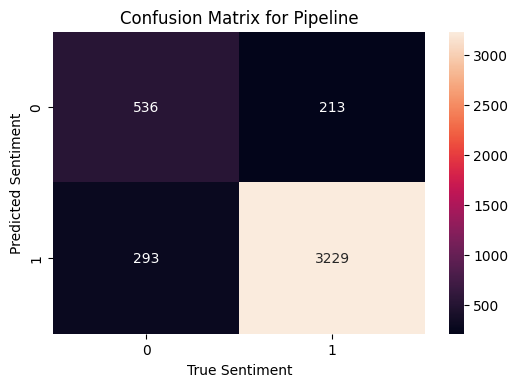

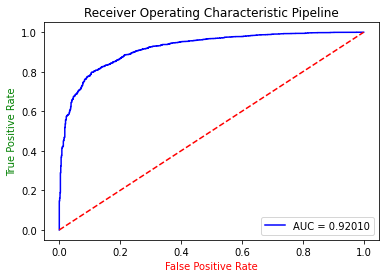

In [46]:
with open('pipeline.pickle','wb') as f:
    pickle.dump(pipe, f)
    
with open('pipeline.pickle', 'rb') as f:
    loaded_pipe = pickle.load(f)

model_evaluate(loaded_pipe)

In [47]:
def predict(model, text):
    # Predict the sentiment
    preprocessed_text = [preprocess([review])[0] for review in text]
    predictions = model.predict(preprocessed_text)

    pred_to_label = {0: 'Negative', 1: 'Positive'}

    # Make a list of text with sentiment.
    data = []
    for t, pred in zip(text, predictions):
        data.append((t, pred, pred_to_label[pred]))

    return data

In [50]:
if __name__=="__main__":
    # Text to classify should be in a list.
    text = ["I like hotel y very much.",
            "Bad service and small rooms."]

    predictions = predict(loaded_pipe, text)
    print(predictions)

[('I like hotel y very much.', 1.0, 'Positive'), ('Bad service and small rooms.', 0.0, 'Negative')]
